# Milestone 2

## 1 - PERKENALAN

Nama : Rafael Adrian Kurniadi

Batch : HCK-021

**Link Dataset:**
https://www.kaggle.com/datasets/nikhil7280/weather-type-classification

**Problem Statement**
Cuaca adalah salah satu faktor yang memengaruhi banyak aspek kehidupan, baik individu maupun sektor bisnis. Dengan variabel seperti suhu, kelembapan, kecepatan angin, dan tekanan atmosfer, cuaca dapat memengaruhi aktivitas luar ruangan, keputusan transportasi, perencanaan pertanian, hingga kesiapsiagaan terhadap kondisi cuaca ekstrem. Namun, tanpa analisis yang mendalam, kita sering kali tidak memahami bagaimana pola cuaca terbentuk dan bagaimana elemen-elemen cuaca tersebut saling memengaruhi satu sama lain. Untuk itu, diperlukan analisis data cuaca untuk mengidentifikasi pola dan memberikan wawasan yang lebih mendalam guna meningkatkan perencanaan dan kesiapsiagaan.

**Goals**
Membuat model untuk memprediksi tipe cuaca yang seperti apa menggunakan metode Decision Tree, Logistic Regression, Random Forest, XGBoost Clsssifier, dan SVM.

**Dataset Information**
|Column Name|Explanation|Range/Values|
|:-:|:-|-:|
|Temperature|Suhu pada hari tersebut|14.0,30.0,27.0,....|
|Humidity|Brand Mobil|Ford, Chevrolet, Other|
|Wind Speed|Tingkat kekencangan angin|1.5,7.0,8.5,....|
|Precipitation|Tipe mobil|Base, SE, Other|
|Cloud Cover|Bentuk body mobil|Sedan, SUV, Other|
|Atmospheric Pressure|Transmisi mobil|automatic, manual|
|UV Index|Tingkat UV di hari tersebut|1,2,3,4|
|Season|Musim yang sedang berlangsung|Winter,Spring,Summer|
|Visibility (km)|Visibilitas penglihatan|1.0,2.0,3.0|
|Location|Lokasi|Mountain,Inland,Coastal|
|Weather Type|Tipe cuaca|Rainy,Cloudy,Sunny|

## 2 - IMPORT LIBRARIES
> Import Libraries merupakan tahap awal dalam sebuah notebook karena libraries ini akan berguna dan membantu pengerjaan notebook ini kedepannya dan dalam libraries ini harus berisi dan hanya berisi library yang dibutuhkan saja dalam pengerjaan ini

In [966]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
import json

from scipy.stats import spearmanr, kendalltau
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from feature_engine.outliers import Winsorizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize





## 3 - DATA LOADING
> Data Loading merupakan tahap yang berisikan proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dan lain-lain.

In [898]:
# Load Dataset
df = pd.read_csv('weather_classification_data.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


Setelah melakukan pengecekan data, dapat dilihat bahwa dataset ini memiliki kolom sebanyak 11 kolom dan memiliki baris sebanyak 13200 baris

In [899]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [900]:
df.tail(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13190,30.0,24,3.5,16.0,partly cloudy,1017.54,11,Summer,6.5,mountain,Sunny
13191,27.0,48,6.5,14.0,clear,1029.37,8,Summer,8.0,inland,Sunny
13192,31.0,24,8.0,5.0,clear,1029.61,8,Summer,9.0,inland,Sunny
13193,-5.0,65,15.5,50.0,overcast,982.57,1,Winter,5.0,inland,Snowy
13194,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [901]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


- Dapat dilihat, pada dataset ini terdapat sebanyak 10 kolom dan masing-masing kolom di data tersebut memiliki 3 tipe yang berbeda yaitu 5 kolom bertipe float, 2 kolom bertipe integer, dan 4 kolom bertipe object.
- Tidak adanya sebuah missing value dalam data ini.

In [902]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,13200.0,19.127576,17.386327,-25.00,4.0,21.00,31.0000,109.00
Humidity,13200.0,68.710833,20.194248,20.00,57.0,70.00,84.0000,109.00
Wind Speed,13200.0,9.832197,6.908704,0.00,5.0,9.00,13.5000,48.50
Precipitation (%),13200.0,53.644394,31.946541,0.00,19.0,58.00,82.0000,109.00
Atmospheric Pressure,13200.0,1005.827896,37.199589,800.12,994.8,1007.65,1016.7725,1199.21
UV Index,13200.0,4.005758,3.856600,0.00,1.0,3.00,7.0000,14.00
Visibility (km),13200.0,5.462917,3.371499,0.00,3.0,5.00,7.5000,20.00


In [903]:
df[df.duplicated()]

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type


Setelah melakukan pengecekan data duplikat ternyata data ini tidak terdapat data duplikat yang artinya tidak perlu dilakukan handling data duplikat.

In [904]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

Setelah dilakukan pengecekan ulang pada missing values, ternyata memang data ini tidak memiliki missing values yang artinya kita tidak perlu menghandling missing values pada data ini

## 4 - EXPLORATORY DATA ANALYSIS (EDA)
> Exploratory Data Analysis (EDA) merupakan tahap yang berisikan tentang eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya. Berisikan jawaban atas pertanyaan mengenai EDA yang telah ditentukan pada bagian ini. Selain itu dapat melakukan eksplorasi lain mengenai EDA diluar dari pertanyaan yang ada.

### 1 - Bagaimana distribusi suhu (Temperature) di berbagai musim (Season)?

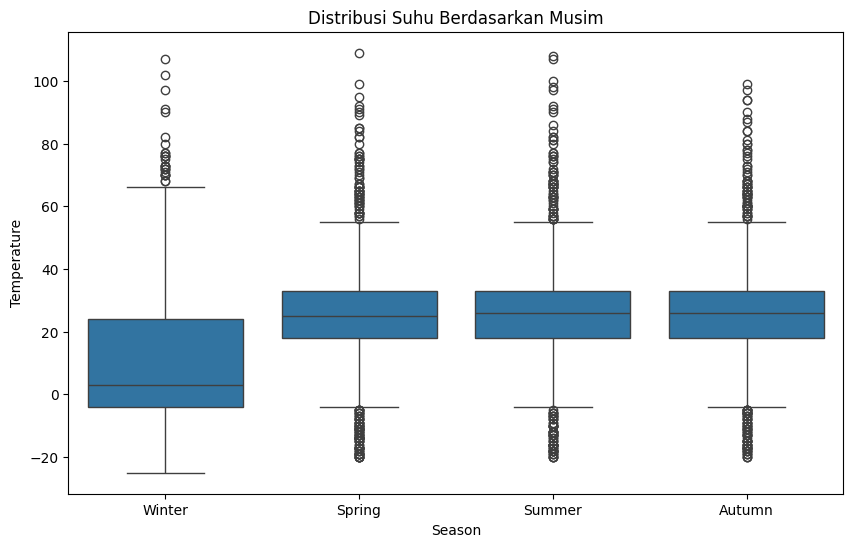

In [905]:
# Visualisasi distribusi suhu berdasarkan musim
plt.figure(figsize=(10,6))
sns.boxplot(x='Season', y='Temperature', data=df)
plt.title('Distribusi Suhu Berdasarkan Musim')
plt.show()

- **Winter** memiliki rentang suhu yang lebih rendah dengan median di bawah 10°C, dan distribusi suhu terendah dari keempat musim. Terdapat beberapa outlier yang menunjukkan suhu yang lebih tinggi meskipun jarang.

- **Spring** menunjukkan median suhu sekitar 30°C dengan rentang yang lebih luas dibandingkan Winter, mencerminkan adanya kenaikan suhu di musim semi.

- **Summer** adalah musim dengan suhu tertinggi, dengan median sekitar 40°C dan banyak outlier yang menunjukkan suhu lebih dari 80°C.

- **Autumn** memiliki rentang suhu yang sedikit lebih rendah dari Summer, dengan median yang hampir sama dengan Spring.

### 2 - Apakah ada hubungan antara kecepatan angin (Wind Speed) dan kelembaban (Humidity) terhadap jenis cuaca (Weather Type)?

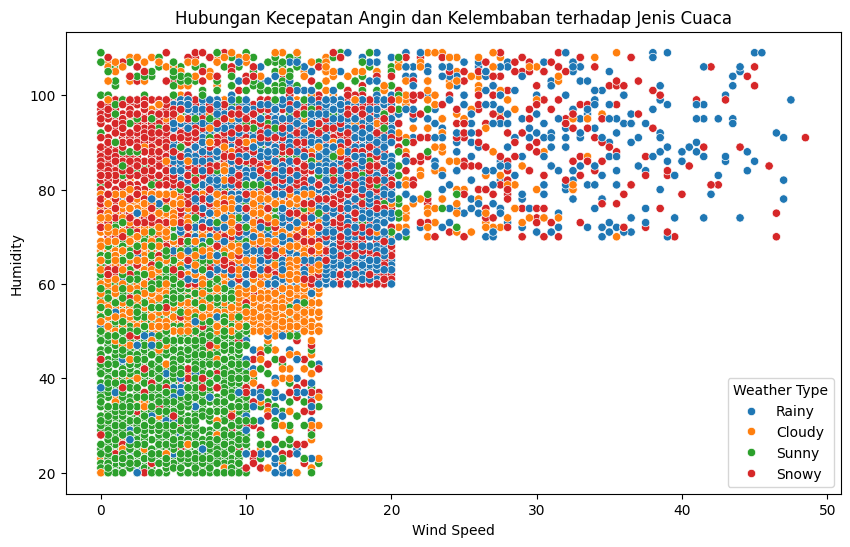

In [906]:
# Visualisasi scatter plot kecepatan angin vs kelembaban berdasarkan jenis cuaca
plt.figure(figsize=(10,6))
sns.scatterplot(x='Wind Speed', y='Humidity', hue='Weather Type', data=df)
plt.title('Hubungan Kecepatan Angin dan Kelembaban terhadap Jenis Cuaca')
plt.show()

Dari hasil visualisasi scatter plot diatas, menunjukkan bahwa terdapat adanya pola tertentu yang dapat diamati di mana cuaca hujan cenderung terjadi pada tingkat kelembaban yang tinggi dan kecepatan angin yang lebih bervariasi. Sementara itu, cuaca cerah (Sunny) cenderung terjadi pada tingkat kelembaban yang lebih rendah, dengan kecepatan angin yang cukup rendah hingga sedang.

### 3 - Bagaimana pengaruh tekanan atmosfer (Atmospheric Pressure) terhadap probabilitas presipitasi (Precipitation %)?

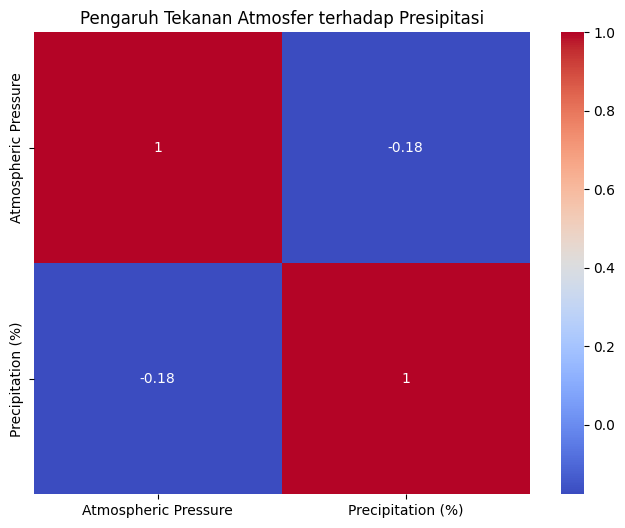

In [907]:
# Membuat heatmap untuk melihat korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Atmospheric Pressure', 'Precipitation (%)']].corr(), annot=True, cmap='coolwarm')
plt.title('Pengaruh Tekanan Atmosfer terhadap Presipitasi')
plt.show()


Dari hasil visualisasi heatmap diatas, menunjukkan adanya korelasi antara tekanan atmosfer dan presipitasi. Korelasi antara kedua variabel tersebut adalah -0.18, yang menunjukkan korelasi negatif yang sangat lemah. Artinya, ketika tekanan atmosfer meningkat, presipitasi cenderung menurun, tetapi pengaruhnya tidak terlalu signifikan. Ini konsisten dengan fakta bahwa tekanan atmosfer yang rendah sering dikaitkan dengan kondisi cuaca basah (hujan), sedangkan tekanan yang lebih tinggi biasanya diasosiasikan dengan cuaca cerah atau kering.

### 4 - Bagaimana distribusi indeks UV (UV Index) di berbagai jenis lokasi (Location)?

C:\Users\Rafael Kurniadi\AppData\Local\Temp\ipykernel_5340\1807979853.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='UV Index', data=df, palette='muted')


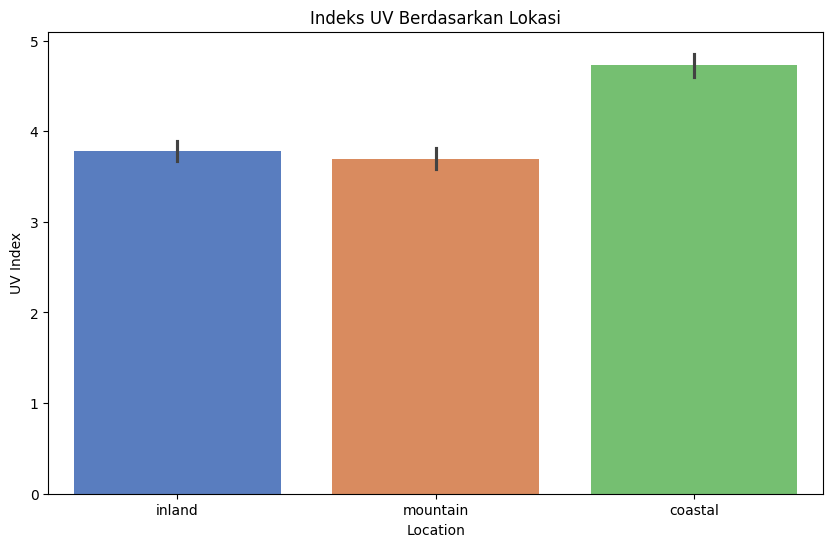

In [908]:
# Bar chart distribusi UV Index per lokasi
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='UV Index', data=df, palette='muted')
plt.title('Indeks UV Berdasarkan Lokasi')
plt.show()

Dari hasil visualisasi bar chart diatas, menunjukkan bahwa lokasi pesisir (coastal) memiliki indeks UV yang lebih tinggi dibandingkan dengan lokasi lainnya, seperti pegunungan (mountain) dan pedalaman (inland). Hal ini mungkin karena intensitas sinar matahari di wilayah pesisir yang lebih besar. Disisi lain, juga terdapat outlier dari masing-masing lokasi yang menunjukkan mungkin ada peningkatan UV sewaktu-waktu.

### 5 - Bagaimana tingkat visibilitas (Visibility) di setiap kondisi cuaca (Weather Type)?

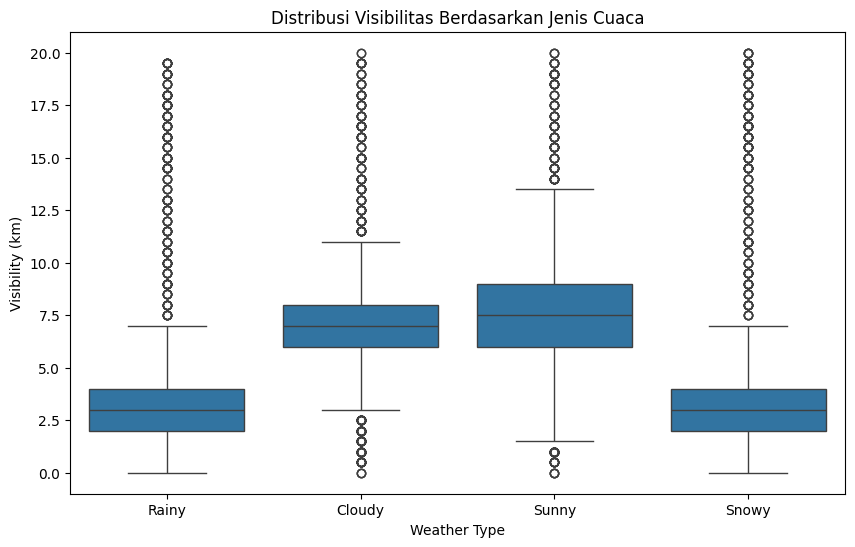

In [909]:
# Boxplot visibilitas berdasarkan jenis cuaca
plt.figure(figsize=(10,6))
sns.boxplot(x='Weather Type', y='Visibility (km)', data=df)
plt.title('Distribusi Visibilitas Berdasarkan Jenis Cuaca')
plt.show()

Dari hasil visualisasi boxplot diatas, menunjukkan bahwa cuaca cerah (Sunny) menunjukkan tingkat visibilitas yang tinggi, sedangkan cuaca berawan (Cloudy) dan hujan (Rainy) cenderung memiliki visibilitas yang lebih rendah. Hujan secara khusus memiliki rentang visibilitas yang sangat rendah, yang konsisten dengan kondisi saat hujan yang sering menghalangi pandangan.

### 6 - Bagaimana pengaruh cakupan awan (Cloud Cover) terhadap kejadian cuaca seperti cerah (Sunny), berawan (Cloudy), atau hujan (Rainy)?

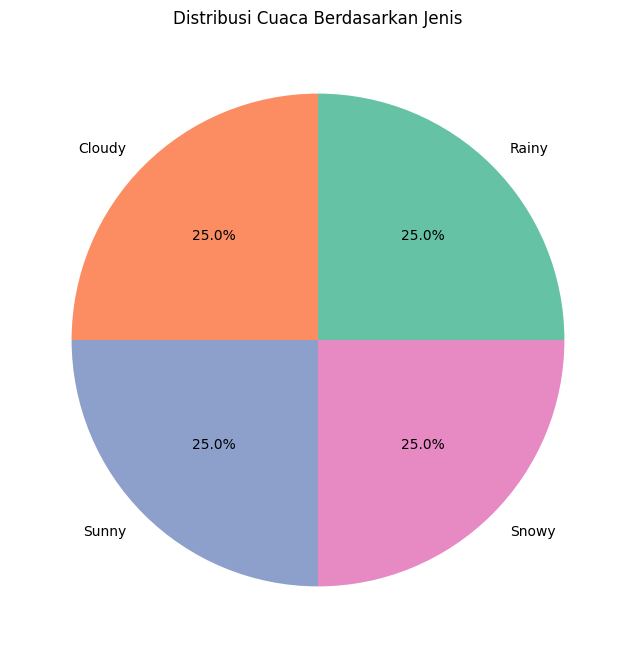

In [910]:
# Menghitung distribusi cakupan awan berdasarkan jenis cuaca
cloud_weather_counts = df['Weather Type'].value_counts()

# Pie chart untuk cakupan awan per jenis cuaca
plt.figure(figsize=(8,8))
plt.pie(cloud_weather_counts, labels=cloud_weather_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Distribusi Cuaca Berdasarkan Jenis')
plt.show()

Dari hasil visualisasi pie chart diatas menunjukkan distribusi yang cukup seimbang antara cuaca cerah (Sunny), berawan (Cloudy), dan hujan (Rainy). Tidak ada satu jenis cuaca yang mendominasi secara signifikan dan cenderung sama rata.

## 5 - FEATURE ENGINEERING
> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-set dan test-set, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### Cardinality Checking

In [911]:
def check_cardinality(data):
    results = []
    for i in data.columns:
        num_categories = len(data[i].unique())
        unique_values = data[i].unique()
        results.append({
            'Variable': i,
            'Number of Categories': num_categories,
            'Unique Values': unique_values
        })
    
    results_df = pd.DataFrame(results)
    return results_df

cardinality_df = check_cardinality(df)
cardinality_df

,Variable,Number of Categories,Unique Values
0,Temperature,126,"[14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0..."
1,Humidity,90,"[73, 96, 64, 83, 74, 55, 97, 85, 45, 43, 59, 8..."
2,Wind Speed,97,"[9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 2.0,..."
3,Precipitation (%),110,"[82.0, 71.0, 16.0, 66.0, 26.0, 86.0, 96.0, 107..."
4,Cloud Cover,4,"[partly cloudy, clear, overcast, cloudy]"
5,Atmospheric Pressure,5456,"[1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1..."
6,UV Index,15,"[2, 7, 5, 1, 0, 8, 11, 3, 9, 4, 13, 10, 14, 6,..."
7,Season,4,"[Winter, Spring, Summer, Autumn]"
8,Visibility (km),41,"[3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 7.5, 1.5,..."
9,Location,3,"[inland, mountain, coastal]"


Dari hasil pengecekan cardinality pada dataset, menunjukkan bahwa tingkat cardinality pada masing-masing kolom di dataset ini cukup tinggi. Namun, saya memilih untuk tidak menghandle cardinality tersebut karena jika kita menghandle cardinality yang ada, maka tingkat akurat nilai setiap kolomnya akan berkurang yang akan berguna untuk melakukan prediksi nanti.

### Data Spliting

In [912]:
# Memisahkan variable features dan target
X = df.drop(['Weather Type'], axis = 1)
y = df['Weather Type'] # Data yang akan diprediksi

# Split data ke train dan test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=8)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (10560, 10)
X_test shape: (2640, 10)
y_train shape: (10560,)
y_test shape: (2640,)


Disini kita melakukan spliting data menjadi data train dan data test. Kolom yang akan diprediksi adalah kolom Weather Type dan sisa kolomnya akan berguna sebagai faktor yang akan mempengaruhi kolom Weather Type.

In [913]:
# Melihat data train
X_train

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location
6179,21.0,56,5.0,39.0,partly cloudy,1013.36,3,Summer,8.0,inland
764,23.0,70,9.5,38.0,partly cloudy,1019.56,1,Summer,7.0,mountain
12828,43.0,43,7.5,14.0,clear,1018.70,5,Summer,9.5,coastal
3680,30.0,57,7.0,35.0,overcast,1000.25,4,Spring,7.5,mountain
5866,15.0,54,13.5,36.0,partly cloudy,1016.90,3,Autumn,6.5,coastal
...,...,...,...,...,...,...,...,...,...,...
2181,26.0,85,7.5,62.0,partly cloudy,992.74,3,Winter,1.0,mountain
10601,33.0,54,7.5,22.0,overcast,1008.64,3,Summer,8.5,inland
2033,31.0,57,0.5,31.0,overcast,1014.71,1,Autumn,5.5,coastal
9556,-10.0,67,3.5,66.0,overcast,995.96,1,Winter,1.5,inland


Hasil data diatas ini merupakan data yang akan kita gunakan untuk melakukan data training

In [914]:
# Melihat target
y_train

6179     Cloudy
764      Cloudy
12828     Sunny
3680     Cloudy
5866     Cloudy
          ...  
2181      Rainy
10601    Cloudy
2033     Cloudy
9556      Snowy
4547      Sunny
Name: Weather Type, Length: 10560, dtype: object

Hasil data diatas ini merupakan data yang akan berfungsi sebagai target yang akan diprediksi kedepannya.

### Handling Outliers

In [915]:
# Memilih kolom categorical dan numerical 
cat_val = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
num_val = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menampilkan hasilnya
print('Categories: ', cat_val)
print('Numerical: ', num_val)

Categories:  ['Cloud Cover', 'Season', 'Location']
Numerical:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


Langkah diatas berguna untuk memisahkan kolom kategorikal dan juga numerikal agar memudahkan kita untuk melakukan handling outliers kedepannya dan juga membedakan kolom tersebut yang akan berguna untuk proses analisa kedepannya.

In [916]:
# Melakukan check distribusi skewness
X_train_cols = list(X_train.select_dtypes(exclude='object').columns)

listItem= []

for col in X_train_cols:
  listItem.append([col, round(X_train[col].skew(),1), np.where(
    (round(X_train[col].skew(),1) <= 0.5) & (round(X_train[col].skew(),1) >= -0.5),
    'normal',
    'skewed')])



skewness = pd.DataFrame(columns=['nama kolom', 'nilai skewness', 'distribution'], data= listItem)
skewness

,nama kolom,nilai skewness,distribution
0,Temperature,0.2,normal
1,Humidity,-0.4,normal
2,Wind Speed,1.4,skewed
3,Precipitation (%),-0.2,normal
4,Atmospheric Pressure,-0.2,normal
5,UV Index,0.9,skewed
6,Visibility (km),1.2,skewed


Dari hasil pengecekan outliers pertama, terlihat terdapat kolom yang memiliki distribusi skewed yaitu kolom Wind Speed, UV Index dan Visibility(km). Namun, kita akan coba untuk melakukan pengecekan lagi dengan metode lainnya agar lebih pasti.

In [917]:
def check_outlier(data):
    column = []
    lower_bound = []
    upper_bound = []
    percent_total_outlier = []

    for i in data.columns:
        if data[i].dtype in ['float64', 'int64']:
            skewness = data[i].skew()
            if skewness > 1 or skewness < -1 or (0.5 <= skewness <= 1) or (-1 <= skewness <= -0.5):
                IQR = data[i].quantile(0.75) - data[i].quantile(0.25)
                lower_boundary = data[i].quantile(0.25) - (IQR * 3)
                upper_boundary = data[i].quantile(0.75) + (IQR * 3)
            else:
                lower_boundary = data[i].mean() - 3 * data[i].std()
                upper_boundary = data[i].mean() + 3 * data[i].std()
            
            column.append(i)
            lower_bound.append(lower_boundary)
            upper_bound.append(upper_boundary)

            totout = ((len(data[data[i] > upper_boundary]) / len(data) * 100) + 
                    (len(data[data[i] < lower_boundary]) / len(data) * 100))
            percent_total_outlier.append(totout)
        else:
            pass

    outliers = pd.DataFrame({
        'column': column,
        'upper_boundary': [round(ub, 2) for ub in upper_bound],
        'lower_boundary': [round(lb, 2) for lb in lower_bound],
        'percentage_total_outlier': [round(percent, 2) for percent in percent_total_outlier]
    })

    return outliers

outliers_X_train = check_outlier(X_train)
outliers_X_train

,column,upper_boundary,lower_boundary,percentage_total_outlier
0,Temperature,71.27,-33.00,0.70
1,Humidity,128.99,8.45,0.00
2,Wind Speed,39.00,-20.50,0.45
3,Precipitation (%),149.31,-42.13,0.00
4,Atmospheric Pressure,1117.98,893.97,4.25
5,UV Index,25.00,-17.00,0.00
6,Visibility (km),21.00,-10.50,0.00


Dari hasil pengecekan outliers yang kedua, terlihat terdapat hasil yang berbeda dengan pengecekan outliers yang pertama. Disini terlihat kolom yang memiliki persentase total outlier ada pada kolom Temperature, Wind Speed dan Atmospheric Pressure. Langkah selanjutnya adalah kita akan mencoba melakukan pengecekan terhadap masing-masing nilai pada kolom tersebut.

In [918]:
X_train.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Temperature,10560.0,19.13,17.38,-25.00,4.00,21.00,31.00,109.00
Humidity,10560.0,68.72,20.09,20.00,57.00,70.00,83.00,109.00
Wind Speed,10560.0,9.80,6.96,0.00,5.00,8.50,13.50,48.50
Precipitation (%),10560.0,53.59,31.91,0.00,20.00,58.00,82.00,109.00
Atmospheric Pressure,10560.0,1005.98,37.34,800.12,994.92,1007.66,1016.82,1199.21
UV Index,10560.0,4.00,3.86,0.00,1.00,3.00,7.00,14.00
Visibility (km),10560.0,5.47,3.37,0.00,3.00,5.00,7.50,20.00


Dari hasil pengecekan terhadap masing-masing nilai pada kolom diatas, terlihat bahwa ada beberapa kolom yang memiliki outliers dan nilainya yang tidak normal yaitu kolom Temperature, Humidity dan Precipitation (%) yang dimana seharusnya kolom tersebut nilai maksimalnya hanya di angka 100 sedangkan ini sampai 109 dan pada kolom Temperature nilai minimalnya minus yang artinya adanya outliers dan tidak normal. 

In [919]:
# Capping untuk kolom yang skewed
winsoriser = Winsorizer(capping_method='iqr', 
                          tail='both', 
                          fold=1.5,
                          variables=['Temperature', 'Humidity', 'Precipitation (%)'],
                          missing_values='ignore')
winsoriser.fit(X_train)

X_train_capped = winsoriser.transform(X_train)
X_test_capped = winsoriser.transform(X_test)

In [920]:
#Capping untuk kolom yang normal
winsorizer = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['Wind Speed', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
                            missing_values='ignore')
winsoriser.fit(X_train_capped)

#Fit & Transforming X_train
X_train_capped = winsorizer.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer.transform(X_test_capped)

In [921]:
def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

Temperature - Before Capping


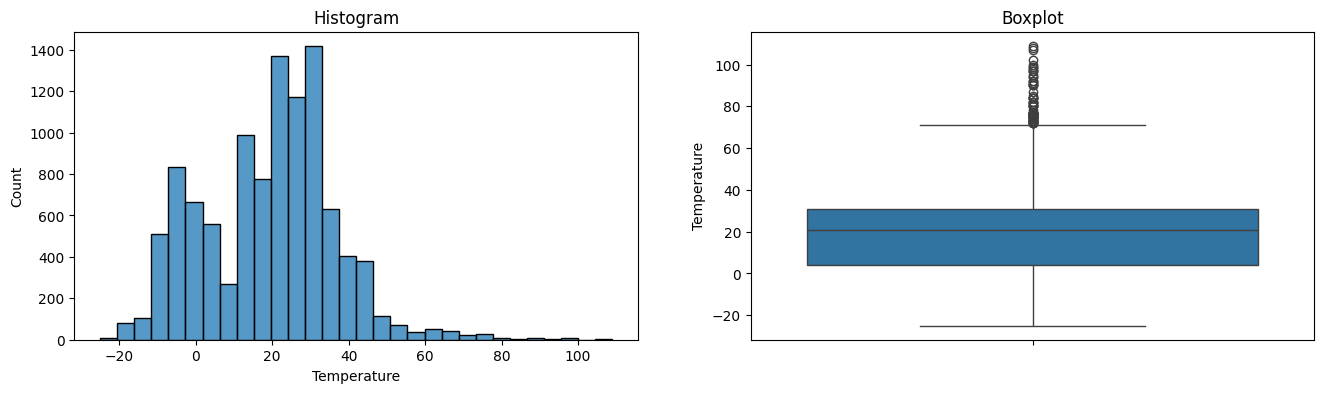


Temperature - After Capping


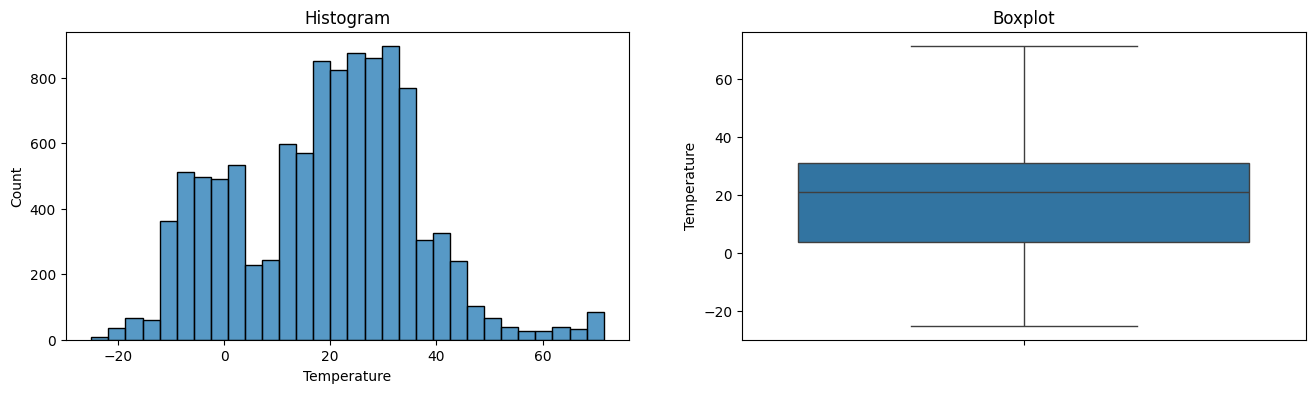

Humidity - Before Capping


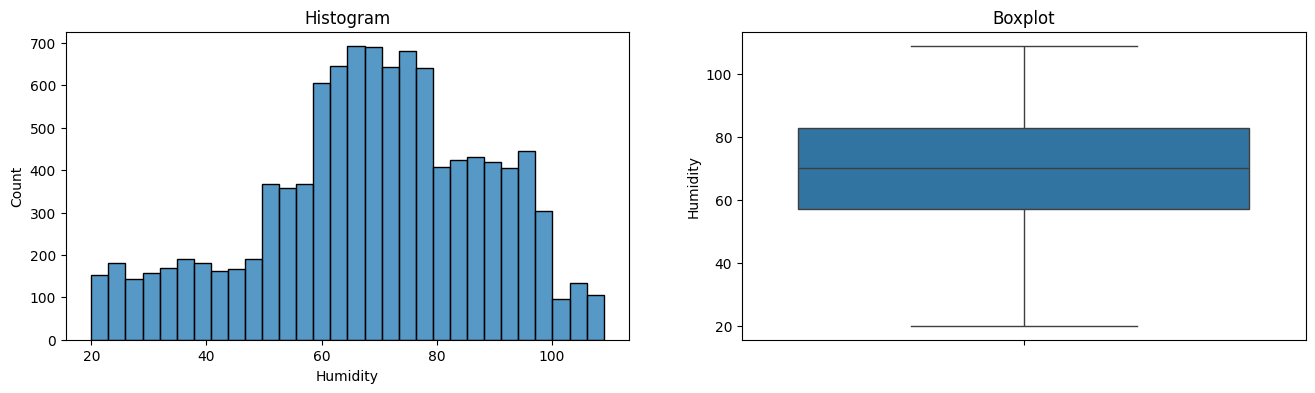


Humidity - After Capping


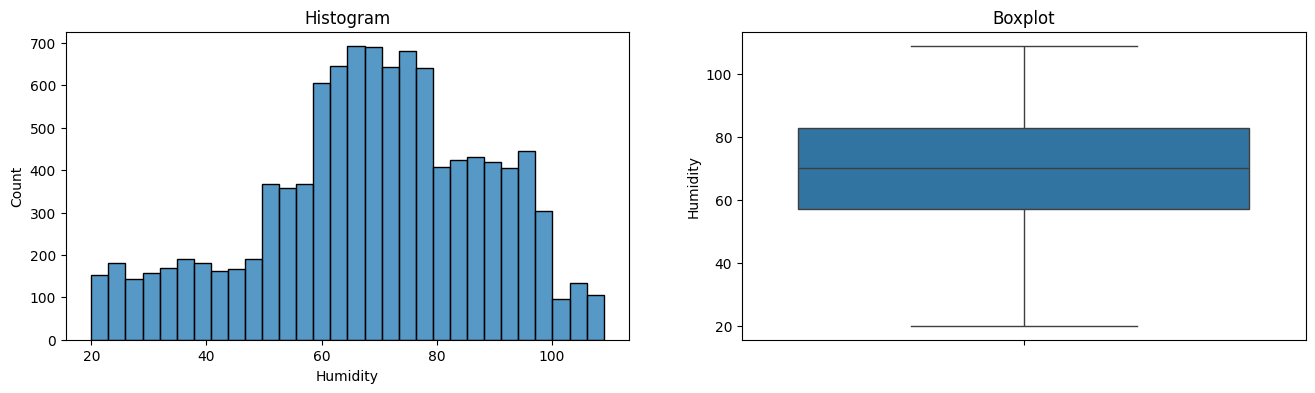

Wind Speed - Before Capping


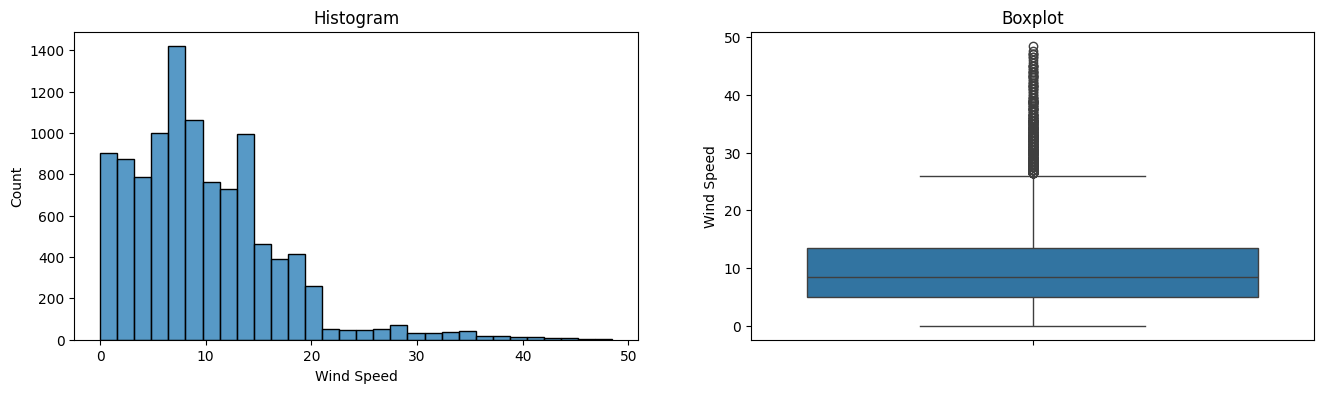


Wind Speed - After Capping


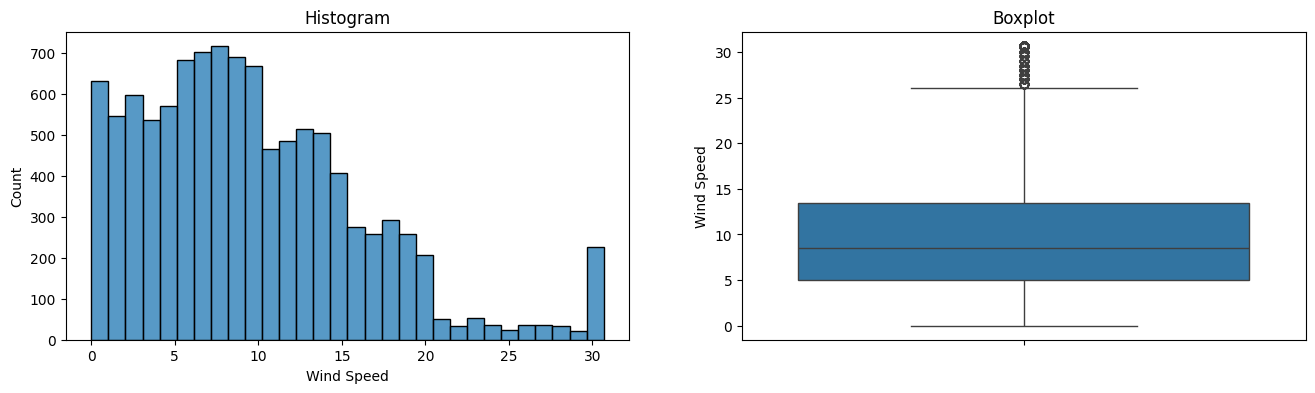

Precipitation (%) - Before Capping


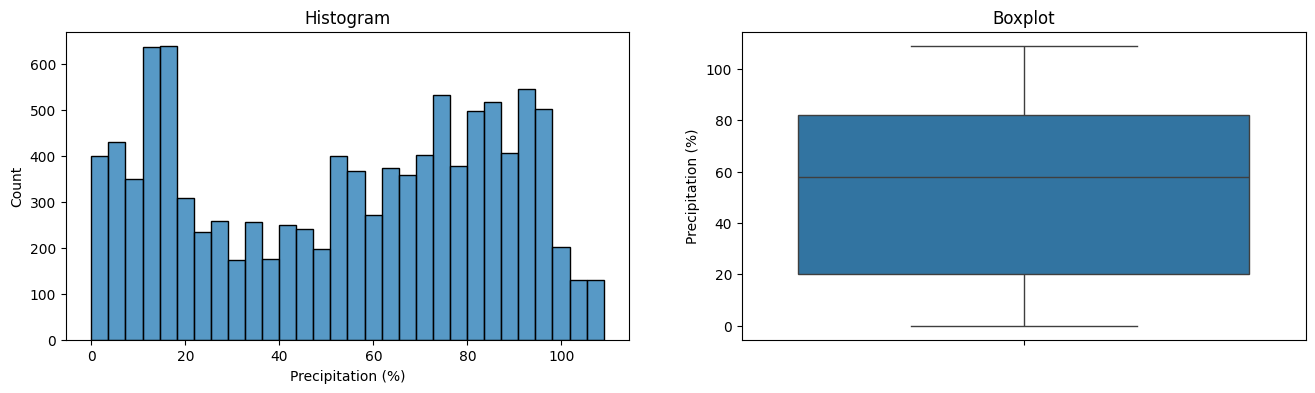


Precipitation (%) - After Capping


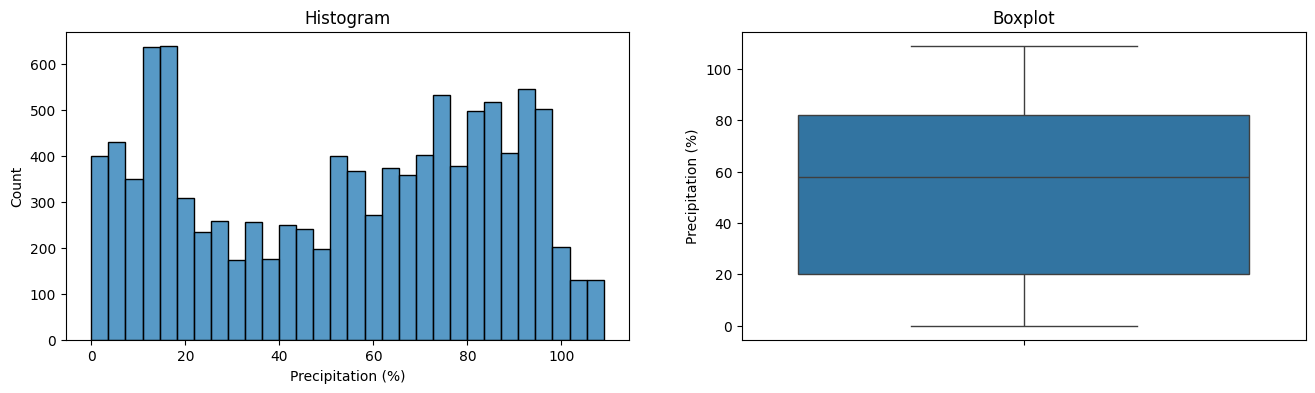

Atmospheric Pressure - Before Capping


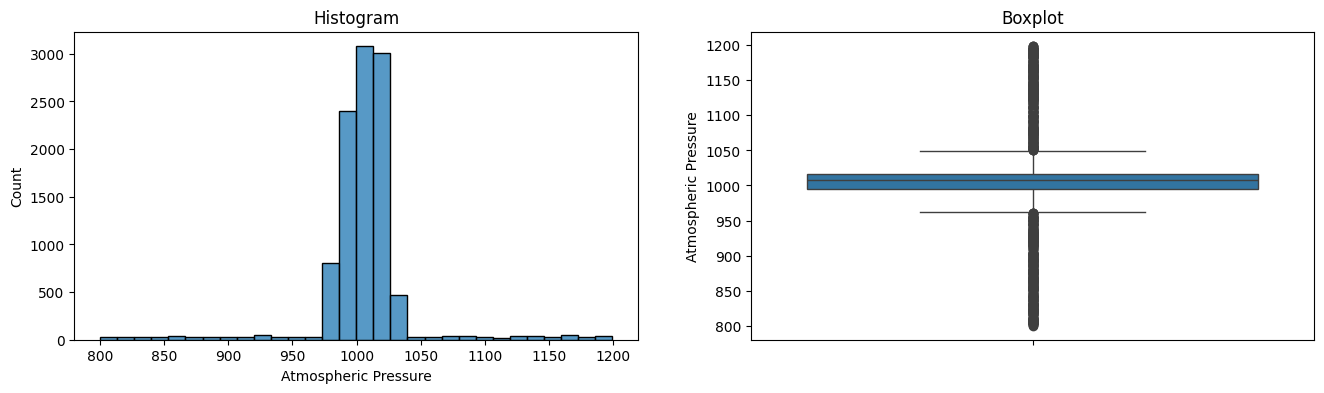


Atmospheric Pressure - After Capping


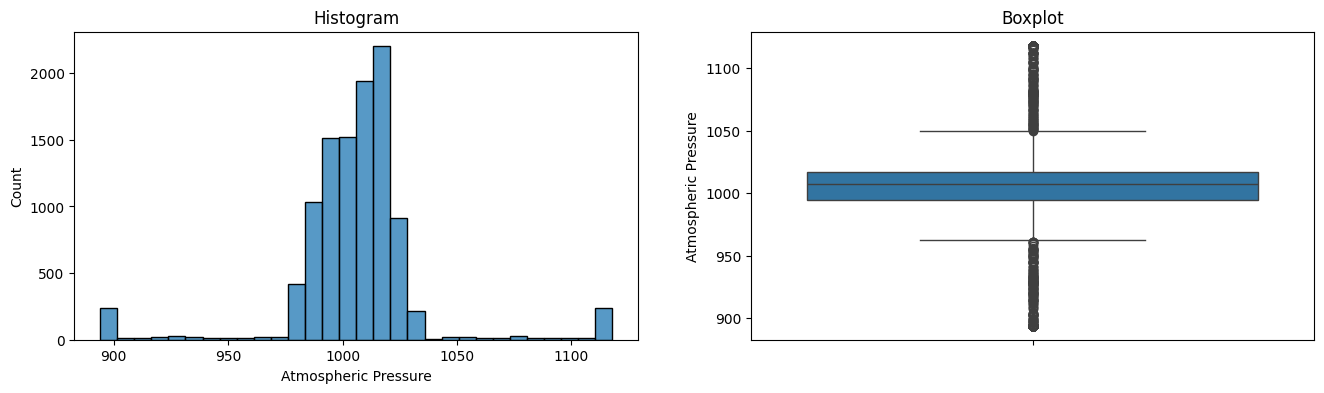

UV Index - Before Capping


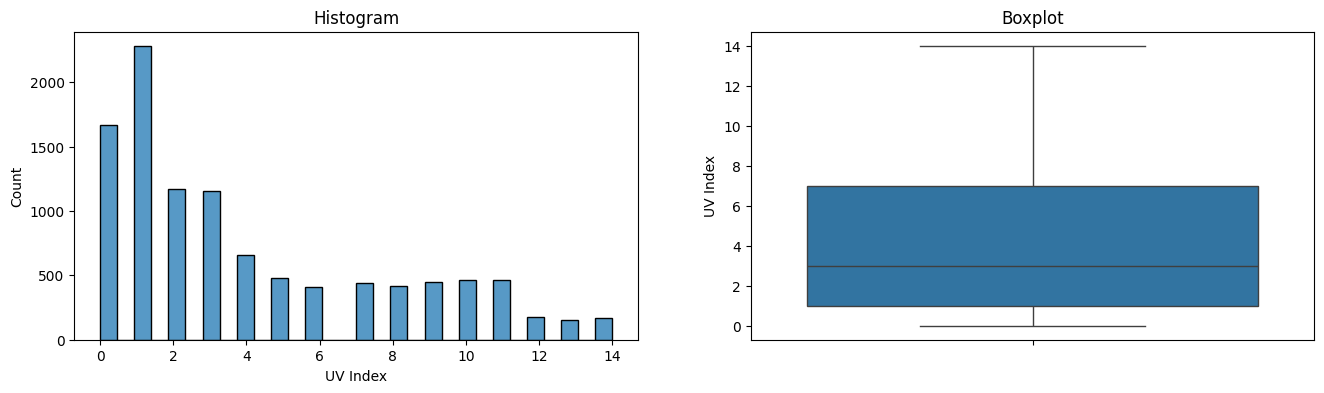


UV Index - After Capping


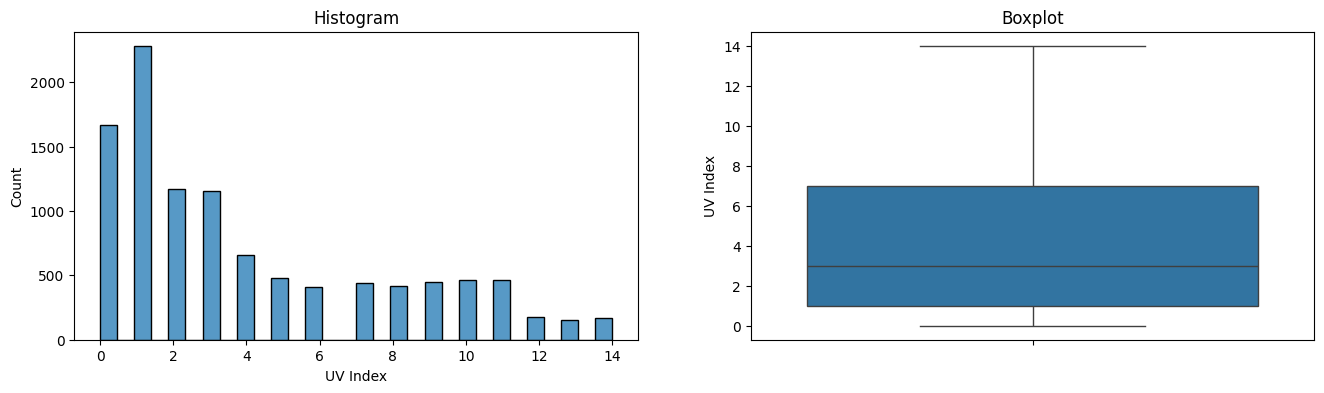

Visibility (km) - Before Capping


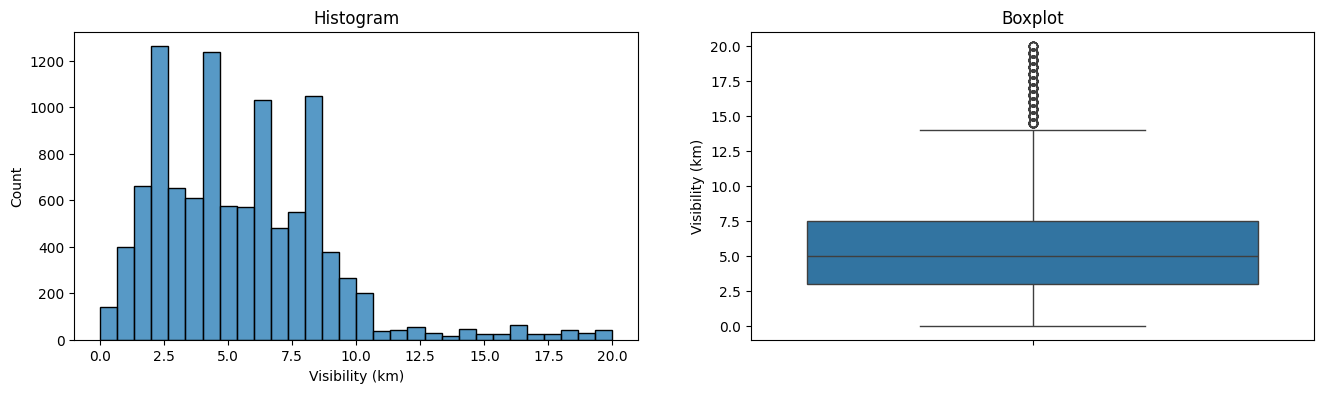


Visibility (km) - After Capping


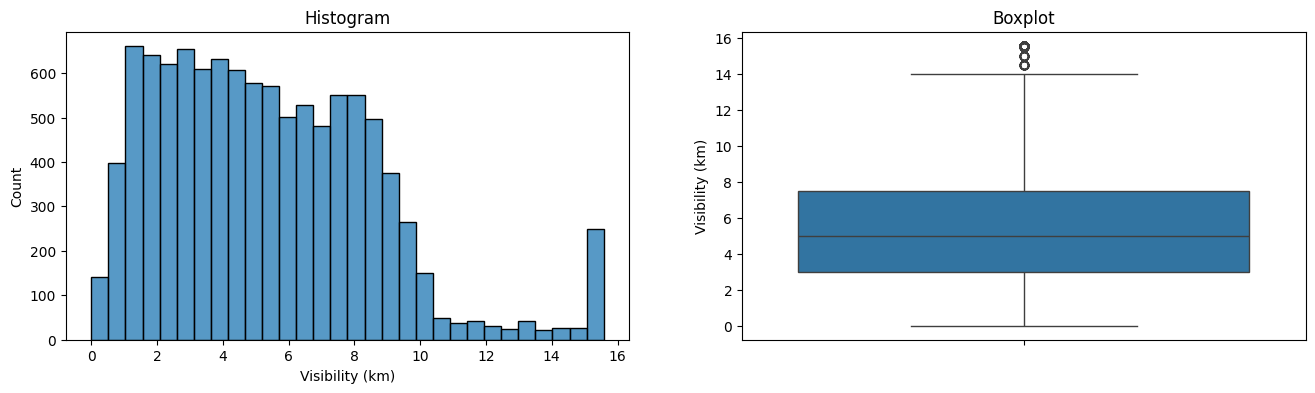

In [922]:
# Check the distribution before and after capping
for col in X_train_cols:
  print(f'{col} - Before Capping')
  diagnostic_plots(X_train, col)

  print(f'\n{col} - After Capping')
  diagnostic_plots(X_train_capped, col)

In [923]:
# Memilih kolom categorical dan numerical 
cat_val = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()
num_val = X_train_capped.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Menampilkan hasilnya
print('Categories: ', cat_val)
print('Numerical: ', num_val)

Categories:  ['Cloud Cover', 'Season', 'Location']
Numerical:  ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']


In [924]:
# Split numerical dan categorical Kolom

X_train_num = X_train_capped[num_val]
X_test_num = X_test_capped[num_val]

X_train_cat = X_train_capped[cat_val]
X_test_cat = X_test_capped[cat_val]

X_train_num

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
6179,21.0,56,5.0,39.0,1013.36,3,8.0
764,23.0,70,9.5,38.0,1019.56,1,7.0
12828,43.0,43,7.5,14.0,1018.70,5,9.5
3680,30.0,57,7.0,35.0,1000.25,4,7.5
5866,15.0,54,13.5,36.0,1016.90,3,6.5
...,...,...,...,...,...,...,...
2181,26.0,85,7.5,62.0,992.74,3,1.0
10601,33.0,54,7.5,22.0,1008.64,3,8.5
2033,31.0,57,0.5,31.0,1014.71,1,5.5
9556,-10.0,67,3.5,66.0,995.96,1,1.5


### Missing Values

In [925]:
X_train_capped.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
dtype: int64

Dapat kita lihat tidak adanya missing values sehingga kita tidak perlu menghandle atau drop missing values tersebut dan kita dapat lanjut ke tahap selanjutnya.

### Uji Korelasi Kolom Numerical Menggunakan Metode Spearman

In [926]:
# Feature selection Numerical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_num.columns:
  corr_coef, p_value = spearmanr(X_train_num[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})

,nama kolom,hasil
0,Temperature,ada korelasi
1,Humidity,ada korelasi
2,Wind Speed,ada korelasi
3,Precipitation (%),ada korelasi
4,Atmospheric Pressure,ada korelasi
5,UV Index,ada korelasi
6,Visibility (km),ada korelasi


Dari hasil uji korelasi kolom numerical diatas, terlihat bahwa semua kolom numerical memiliki korelasi dengan target yang artinya semua kolom numerical tersebut akan kita masukkan ke dalam modelling.

### Uji Korelasi Kolom Categorical Menggunakan Metode Kendall

In [927]:
# Feature selection Categorical columns
p_values = []
interpretasi = []
cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)

  if p_value < 0.05:
    interpretasi.append('ada korelasi')
  else :
    interpretasi.append('ga ada korelasi')

pd.DataFrame({'nama kolom':cols,
              'hasil': interpretasi})


,nama kolom,hasil
0,Cloud Cover,ada korelasi
1,Season,ada korelasi
2,Location,ada korelasi


Dari hasil uji korelasi kolom categorical diatas, terlihat bahwa semua kolom categorical memiliki korelasi dengan target yang artinya semua kolom categorical tersebut akan kita masukkan ke dalam modelling.

## 6 - MODEL DEFINITION
> Model Definition merupakan tahap yang berisikan cell untuk mendefinisikan model dan jelaskan juga alasan mengapa menggunakan suatu algoritma/model, hyperparameter dan juga jenis metrics yang dipakai.

Model-model yang akan digunakan adalah sebagai berikut:

1. **Linear Regression** adalah metode prediksi paling dasar dan sering digunakan. Ini adalah pendekatan linear untuk memodelkan hubungan antara variabel dependen dengan satu atau lebih variabel independen. Dari data ini, kita dapat mengasumsikan bahwa fitur-fitur mungkin memiliki hubungan linear dengan harga. Oleh karena itu, kita akan menggunakan model regresi linear.

2. **Decision Tree** adalah model non-linear yang membagi data menjadi subset berdasarkan nilai fitur, menciptakan struktur seperti pohon. Prediksi akan dibuat berdasarkan aturan keputusan dari fitur-fitur tersebut. Model ini digunakan karena interpretasinya yang mudah serta untuk melihat apakah fitur-fitur memiliki hubungan non-linear dengan harga.

3. **Random Forest Regressor** adalah metode ensemble yang menggabungkan beberapa decision tree untuk menghasilkan model yang lebih kuat dan akurat. Setiap pohon akan dilatih pada subset data acak, dan rata-rata prediksi dari semua pohon akan menjadi prediksi akhir. Model ini digunakan karena kita menginginkan model yang akurat, mampu menangani hubungan non-linear, dan menghindari overfitting.

4. **Support Vector Machine (SVM)** memodelkan data menggunakan fungsi kernel untuk memproyeksikan data ke dimensi yang lebih tinggi. Kita akan menggunakan model ini jika data memiliki hubungan non-linear dan untuk menangani overfitting dengan baik.

5. **Ridge Regression** adalah model machine learning yang membantu mencegah overfitting dengan menambahkan penalti pada ukuran koefisien. Kita akan menggunakan model ini untuk mengatasi kekhawatiran tentang overfitting, terutama karena ada banyak fitur, dan kita ingin meningkatkan generalisasi dan interpretabilitas model.

In [928]:
# Kolom numerikal dan kategorikal
numerical_features = X_train_capped.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train_capped.select_dtypes(include=['object', 'category']).columns.tolist()

# Membuat transformer untuk numerikal dan kategorikal
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values
    ('scaler', StandardScaler())                   # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))     # One-hot encoding
])

# Gabungkan transformer ke dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [929]:
numerical_features

['Temperature',
 'Humidity',
 'Wind Speed',
 'Precipitation (%)',
 'Atmospheric Pressure',
 'UV Index',
 'Visibility (km)']

### Boost

In [930]:
# Pipeline untuk Boosting
pipeline_boost = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', GradientBoostingClassifier())])
pipeline_boost

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'UV Index',
                                                   'Visibility (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('model', GradientBoostingClassifier())])

### KNN

In [931]:
# Pipeline untuk KNN
pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', KNeighborsClassifier())])
pipeline_knn

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'UV Index',
                                                   'Visibility (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('model', KNeighborsClassifier())])

### Decision Tree

In [932]:
# Pipeline untuk Decision Tree
pipeline_dt = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', DecisionTreeClassifier())])
pipeline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'UV Index',
                                                   'Visibility (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('model', DecisionTreeClassifier())])

### Random Forest

In [933]:
# Pipeline untuk Random Forest
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', RandomForestClassifier())])
pipeline_rf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'UV Index',
                                                   'Visibility (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('model', RandomForestClassifier())])

### SVM

In [934]:
# Pipeline untuk SVM
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', SVC())])
pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation (%)',
                                                   'Atmospheric Pressure',
                                                   'UV Index',
                                                   'Visibility (km)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('model', SVC())])

## 7 - MODEL TRAINING
> Model Training merupakan tahap yang berisikan code yang berfungsi untuk melatih model dan output yang dihasilkan. Dalam model training ini, lakukanlah beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. (Analisis hasil dari model training tersebut)

### Boost

In [935]:
pipeline_boost.fit(X_train_capped, y_train)
print('Training Score: ',round(pipeline_boost.score(X_train_capped, y_train),4))
print('Testing Score: ', round(pipeline_boost.score(X_test_capped, y_test),4))

Training Score:  0.9477
Testing Score:  0.9167


In [936]:
y_boost_pred = pipeline_boost.predict(X_test_capped)
y_boost_pred

array(['Snowy', 'Cloudy', 'Sunny', ..., 'Snowy', 'Rainy', 'Rainy'],
      dtype=object)

In [937]:
target = ['Snowy', 'Cloudy', 'Sunny', 'Rainy']
print(classification_report(y_test, y_boost_pred, target_names = target))

              precision    recall  f1-score   support

       Snowy       0.91      0.89      0.90       639
      Cloudy       0.90      0.93      0.91       669
       Sunny       0.94      0.91      0.93       666
       Rainy       0.92      0.93      0.92       666

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



### KNN

In [938]:
pipeline_knn.fit(X_train_capped, y_train)
print('Training Score: ',round(pipeline_knn.score(X_train_capped, y_train),4))
print('Testing Score: ', round(pipeline_knn.score(X_test_capped, y_test),4))

Training Score:  0.9284
Testing Score:  0.8992


In [939]:
y_knn_pred = pipeline_knn.predict(X_test_capped)
y_knn_pred

array(['Snowy', 'Cloudy', 'Sunny', ..., 'Snowy', 'Rainy', 'Cloudy'],
      dtype=object)

In [940]:
target = ['Snowy', 'Cloudy', 'Sunny', 'Rainy']
print(classification_report(y_test, y_knn_pred, target_names = target))

              precision    recall  f1-score   support

       Snowy       0.87      0.87      0.87       639
      Cloudy       0.86      0.91      0.88       669
       Sunny       0.94      0.91      0.93       666
       Rainy       0.93      0.90      0.91       666

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



### Decision Tree

In [941]:
pipeline_dt.fit(X_train_capped, y_train)
print('Training Score: ',round(pipeline_dt.score(X_train_capped, y_train),4))
print('Testing Score: ', round(pipeline_dt.score(X_test_capped, y_test),4))

Training Score:  1.0
Testing Score:  0.908


In [942]:
y_dt_pred = pipeline_dt.predict(X_test_capped)
y_dt_pred

array(['Snowy', 'Rainy', 'Sunny', ..., 'Snowy', 'Rainy', 'Cloudy'],
      dtype=object)

In [943]:
target = ['Snowy', 'Cloudy', 'Sunny', 'Rainy']
print(classification_report(y_test, y_dt_pred, target_names = target))

              precision    recall  f1-score   support

       Snowy       0.88      0.88      0.88       639
      Cloudy       0.90      0.91      0.90       669
       Sunny       0.94      0.91      0.92       666
       Rainy       0.91      0.93      0.92       666

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



### Random Forest

In [944]:
pipeline_rf.fit(X_train_capped, y_train)
print('Training Score: ',round(pipeline_rf.score(X_train_capped, y_train),4))
print('Testing Score: ', round(pipeline_rf.score(X_test_capped, y_test),4))

Training Score:  1.0
Testing Score:  0.9231


In [945]:
y_rf_pred = pipeline_rf.predict(X_test_capped)
y_rf_pred

array(['Snowy', 'Cloudy', 'Sunny', ..., 'Snowy', 'Rainy', 'Rainy'],
      dtype=object)

In [946]:
target = ['Snowy', 'Cloudy', 'Sunny', 'Rainy']
print(classification_report(y_test, y_rf_pred, target_names = target))

              precision    recall  f1-score   support

       Snowy       0.90      0.91      0.91       639
      Cloudy       0.91      0.93      0.92       669
       Sunny       0.94      0.93      0.93       666
       Rainy       0.94      0.93      0.93       666

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640



### SVM

In [947]:
pipeline_svm.fit(X_train_capped, y_train)
print('Training Score: ',round(pipeline_svm.score(X_train_capped, y_train),4))
print('Testing Score: ', round(pipeline_svm.score(X_test_capped, y_test),4))

Training Score:  0.947
Testing Score:  0.908


In [948]:
y_svm_pred = pipeline_svm.predict(X_test_capped)
y_svm_pred

array(['Snowy', 'Cloudy', 'Sunny', ..., 'Snowy', 'Rainy', 'Cloudy'],
      dtype=object)

In [949]:
target = ['Snowy', 'Cloudy', 'Sunny', 'Rainy']
print(classification_report(y_test, y_svm_pred, target_names = target))

              precision    recall  f1-score   support

       Snowy       0.88      0.89      0.89       639
      Cloudy       0.90      0.91      0.90       669
       Sunny       0.95      0.91      0.93       666
       Rainy       0.90      0.92      0.91       666

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



In [950]:
%time

def baseline_scores(models, X_train, X_test, y_train, y_test):
    """
    Menghitung dan menampilkan baseline score (precision dan recall) untuk setiap model.

    Args:
        models: Dictionary berisi nama model dan model yang telah dilatih.
        X_train: Data pelatihan.
        X_test: Data pengujian.
        y_train: Target pelatihan.
        y_test: Target pengujian.
    """
    for model_name, model in models.items():
        # Membuat prediksi
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Menghitung precision dan recall
        train_precision = precision_score(y_train, y_train_pred, average='macro')  
        train_recall = recall_score(y_train, y_train_pred, average='macro')        

        test_precision = precision_score(y_test, y_test_pred, average='macro')     
        test_recall = recall_score(y_test, y_test_pred, average='macro')           


        # Menampilkan hasil
        print(f"Model: {model_name}")
        print(f"Training Precision: {train_precision:.2f}")
        print(f"Training Recall: {train_recall:.2f}")
        print(f"Test Precision: {test_precision:.2f}")
        print(f"Test Recall: {test_recall:.2f}")
        print("-" * 30)

# Misalkan model-model Anda sudah disimpan dalam dictionary seperti ini
models = {
    'KNN': pipeline_knn,
    'SVM': pipeline_svm,
    'Decision Tree': pipeline_dt,
    'Random Forest': pipeline_rf,
    'Boosting': pipeline_boost
}

# Panggil fungsi untuk menghitung dan menampilkan baseline score
baseline_scores(models, X_train, X_test, y_train, y_test)


CPU times: total: 0 ns
Wall time: 0 ns
Model: KNN
Training Precision: 0.93
Training Recall: 0.93
Test Precision: 0.90
Test Recall: 0.90
------------------------------
Model: SVM
Training Precision: 0.95
Training Recall: 0.95
Test Precision: 0.91
Test Recall: 0.91
------------------------------
Model: Decision Tree
Training Precision: 1.00
Training Recall: 1.00
Test Precision: 0.91
Test Recall: 0.91
------------------------------
Model: Random Forest
Training Precision: 1.00
Training Recall: 1.00
Test Precision: 0.92
Test Recall: 0.92
------------------------------
Model: Boosting
Training Precision: 0.95
Training Recall: 0.95
Test Precision: 0.92
Test Recall: 0.92
------------------------------


## 8 - MODEL EVALUATION

In [951]:
def evaluate_roc_auc(roc_auc_value):
    """Evaluasi skor ROC-AUC ke dalam kategori evaluasi"""
    if roc_auc_value >= 0.9:
        return "Excellent"
    elif roc_auc_value >= 0.8:
        return "Good"
    elif roc_auc_value >= 0.7:
        return "Fair"
    elif roc_auc_value >= 0.6:
        return "Poor"
    else:
        return "Fail"

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluasi model dengan ROC-AUC, plot ROC Curve, dan classification report.

    Args:
        model: Model yang telah dilatih.
        X_train: Data pelatihan.
        X_test: Data pengujian.
        y_train: Target pelatihan.
        y_test: Target pengujian.
    """
    # Menghitung prediksi probabilitas untuk setiap kelas
    y_train_prob = model.predict_proba(X_train)
    y_test_prob = model.predict_proba(X_test)

    # Binarisasi label target untuk multi-class ROC-AUC
    y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    n_classes = y_train_bin.shape[1]

    # Menghitung ROC-AUC
    roc_auc_train = roc_auc_score(y_train_bin, y_train_prob, multi_class='ovr')
    roc_auc_test = roc_auc_score(y_test_bin, y_test_prob, multi_class='ovr')

    # Menampilkan hasil evaluasi ROC-AUC
    print('ROC-AUC - Train : ', roc_auc_train)
    print('ROC-AUC - Test  : ', roc_auc_test)

    print("ROC-AUC Train Evaluation: ", evaluate_roc_auc(roc_auc_train))
    print("ROC-AUC Test Evaluation: ", evaluate_roc_auc(roc_auc_test))

    # Menghitung dan menampilkan ROC Curve untuk setiap kelas
    plt.figure(figsize=(10, 6))
    for i in range(n_classes):
        fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
        fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])

        roc_auc_train_class = auc(fpr_train, tpr_train)
        roc_auc_test_class = auc(fpr_test, tpr_test)

        plt.plot(fpr_train, tpr_train, lw=2, label=f'ROC Curve Train Class {i} (AUC = {roc_auc_train_class:.2f})')
        plt.plot(fpr_test, tpr_test, lw=2, linestyle='--', label=f'ROC Curve Test Class {i} (AUC = {roc_auc_test_class:.2f})')

    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Garis diagonal
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for Multi-Class')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Menampilkan Classification Report
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("Classification Report - Train Data")
    print(classification_report(y_train, y_train_pred))

    print("Classification Report - Test Data")
    print(classification_report(y_test, y_test_pred))

    # Evaluasi beberapa metrics
    def evaluate_model_performance(y_true, y_pred, y_prob):
        acc = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        roc_auc = roc_auc_score(label_binarize(y_true, classes=np.unique(y_true)), y_prob, multi_class='ovr')

        print(f"Accuracy       : {acc:.2f}")
        print(f"Precision      : {precision:.2f}")
        print(f"Recall         : {recall:.2f}")
        print(f"F1-Score       : {f1:.2f}")
        print(f"ROC-AUC        : {roc_auc:.2f}")
        print(f"ROC-AUC Evaluation : {evaluate_roc_auc(roc_auc)}")

    # Evaluasi performa pada train data
    print("Evaluation Metrics - Train Data")
    evaluate_model_performance(y_train, y_train_pred, y_train_prob)

    # Evaluasi performa pada test data
    print("Evaluation Metrics - Test Data")
    evaluate_model_performance(y_test, y_test_pred, y_test_prob)


### Boost

ROC-AUC - Train :  0.9968613364225891
ROC-AUC - Test  :  0.9929557012054911
ROC-AUC Train Evaluation:  Excellent
ROC-AUC Test Evaluation:  Excellent


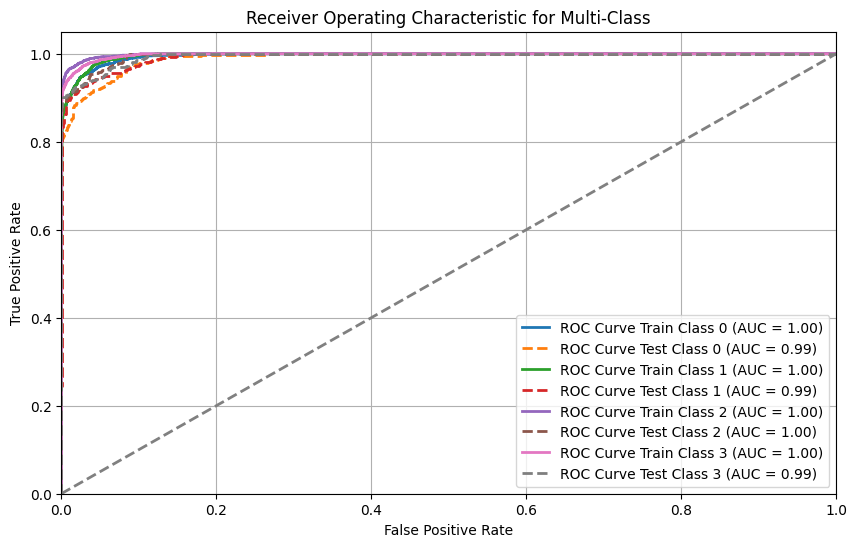

Classification Report - Train Data
              precision    recall  f1-score   support

      Cloudy       0.94      0.93      0.94      2661
       Rainy       0.92      0.95      0.94      2631
       Snowy       0.97      0.96      0.97      2634
       Sunny       0.95      0.95      0.95      2634

    accuracy                           0.95     10560
   macro avg       0.95      0.95      0.95     10560
weighted avg       0.95      0.95      0.95     10560

Classification Report - Test Data
              precision    recall  f1-score   support

      Cloudy       0.91      0.89      0.90       639
       Rainy       0.90      0.93      0.91       669
       Snowy       0.94      0.91      0.93       666
       Sunny       0.92      0.93      0.92       666

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Evaluation Metrics - Train Data
Accuracy       : 0.95
Precisi

In [952]:
# Evaluasi Boost
evaluate_model(pipeline_boost, X_train_capped, X_test_capped, y_train, y_test)

### KNN

ROC-AUC - Train :  0.9951068918504442
ROC-AUC - Test  :  0.9748250506924256
ROC-AUC Train Evaluation:  Excellent
ROC-AUC Test Evaluation:  Excellent


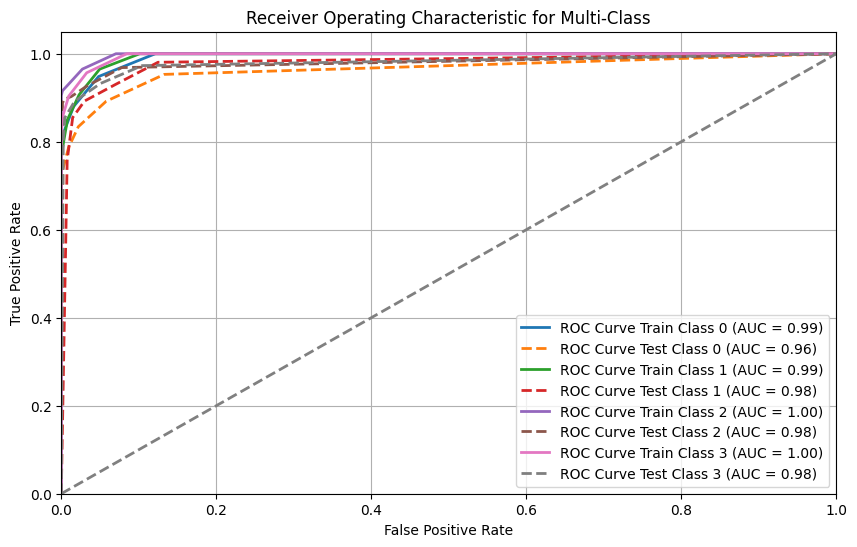

Classification Report - Train Data
              precision    recall  f1-score   support

      Cloudy       0.90      0.92      0.91      2661
       Rainy       0.90      0.93      0.92      2631
       Snowy       0.96      0.95      0.95      2634
       Sunny       0.96      0.91      0.93      2634

    accuracy                           0.93     10560
   macro avg       0.93      0.93      0.93     10560
weighted avg       0.93      0.93      0.93     10560

Classification Report - Test Data
              precision    recall  f1-score   support

      Cloudy       0.87      0.87      0.87       639
       Rainy       0.86      0.91      0.88       669
       Snowy       0.94      0.91      0.93       666
       Sunny       0.93      0.90      0.91       666

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

Evaluation Metrics - Train Data
Accuracy       : 0.93
Precisi

In [953]:
# Evaluasi KNN
evaluate_model(pipeline_knn, X_train_capped, X_test_capped, y_train, y_test)

### Decision Tree

ROC-AUC - Train :  1.0
ROC-AUC - Test  :  0.9385220231855267
ROC-AUC Train Evaluation:  Excellent
ROC-AUC Test Evaluation:  Excellent


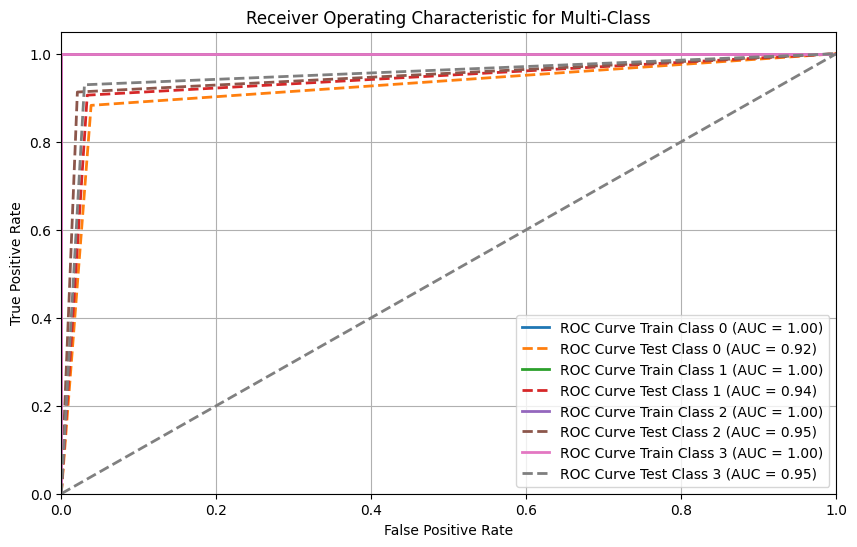

Classification Report - Train Data
              precision    recall  f1-score   support

      Cloudy       1.00      1.00      1.00      2661
       Rainy       1.00      1.00      1.00      2631
       Snowy       1.00      1.00      1.00      2634
       Sunny       1.00      1.00      1.00      2634

    accuracy                           1.00     10560
   macro avg       1.00      1.00      1.00     10560
weighted avg       1.00      1.00      1.00     10560

Classification Report - Test Data
              precision    recall  f1-score   support

      Cloudy       0.88      0.88      0.88       639
       Rainy       0.90      0.91      0.90       669
       Snowy       0.94      0.91      0.92       666
       Sunny       0.91      0.93      0.92       666

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Evaluation Metrics - Train Data
Accuracy       : 1.00
Precisi

In [954]:
# Evaluasi Decision Tree
evaluate_model(pipeline_dt, X_train_capped, X_test_capped, y_train, y_test)

### Random Forest

ROC-AUC - Train :  1.0
ROC-AUC - Test  :  0.994028591757416
ROC-AUC Train Evaluation:  Excellent
ROC-AUC Test Evaluation:  Excellent


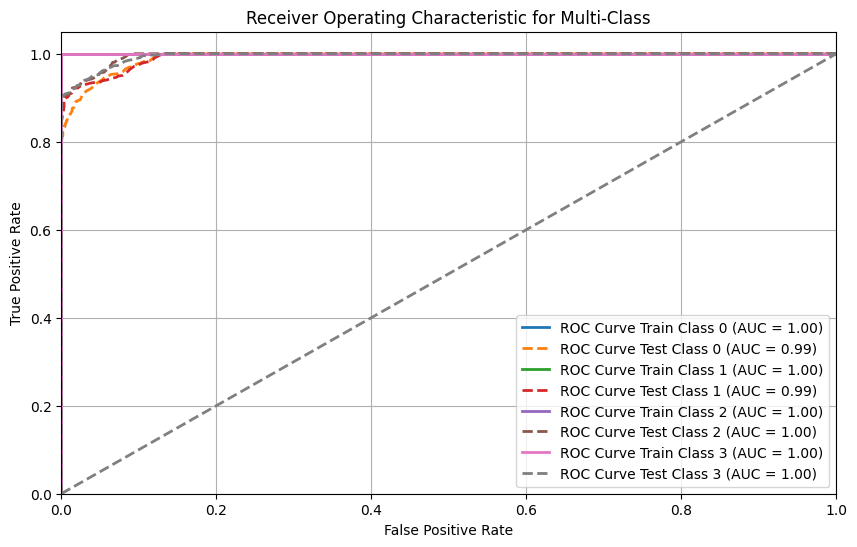

Classification Report - Train Data
              precision    recall  f1-score   support

      Cloudy       1.00      1.00      1.00      2661
       Rainy       1.00      1.00      1.00      2631
       Snowy       1.00      1.00      1.00      2634
       Sunny       1.00      1.00      1.00      2634

    accuracy                           1.00     10560
   macro avg       1.00      1.00      1.00     10560
weighted avg       1.00      1.00      1.00     10560

Classification Report - Test Data
              precision    recall  f1-score   support

      Cloudy       0.90      0.91      0.91       639
       Rainy       0.91      0.93      0.92       669
       Snowy       0.94      0.93      0.93       666
       Sunny       0.94      0.93      0.93       666

    accuracy                           0.92      2640
   macro avg       0.92      0.92      0.92      2640
weighted avg       0.92      0.92      0.92      2640

Evaluation Metrics - Train Data
Accuracy       : 1.00
Precisi

In [955]:
# Evaluasi Random Forest
evaluate_model(pipeline_rf, X_train_capped, X_test_capped, y_train, y_test)

### SVM

In [956]:
# def evaluate_svm_model(model, X_train, X_test, y_train, y_test):
#     """
#     Evaluasi model SVM dengan ROC Curve, dan classification report.

#     Args:
#         model: Model yang telah dilatih.
#         X_train: Data pelatihan.
#         X_test: Data pengujian.
#         y_train: Target pelatihan.
#         y_test: Target pengujian.
#     """
#     # Menghitung prediksi kelas
#     y_train_pred = model.predict(X_train)
#     y_test_pred = model.predict(X_test)

#     # Metrik evaluasi
#     print("Classification Report - Train Data")
#     print(classification_report(y_train, y_train_pred))

#     print("Classification Report - Test Data")
#     print(classification_report(y_test, y_test_pred))

#     # Evaluasi beberapa metrics
#     def evaluate_model_performance(y_true, y_pred):
#         acc = accuracy_score(y_true, y_pred)
#         precision = precision_score(y_true, y_pred, average='macro')
#         recall = recall_score(y_true, y_pred, average='macro')
#         f1 = f1_score(y_true, y_pred, average='macro')

#         print(f"Accuracy       : {acc:.4f}")
#         print(f"Precision      : {precision:.4f}")
#         print(f"Recall         : {recall:.4f}")
#         print(f"F1-Score       : {f1:.4f}")

#     # Evaluasi performa pada train data
#     print("Evaluation Metrics - Train Data")
#     evaluate_model_performance(y_train, y_train_pred)

#     # Evaluasi performa pada test data
#     print("Evaluation Metrics - Test Data")
#     evaluate_model_performance(y_test, y_test_pred)

#     # Hitung probabilitas prediksi untuk ROC Curve
#     y_train_prob = model.predict_proba(X_train)
#     y_test_prob = model.predict_proba(X_test)

#     # Binarize the output
#     n_classes = len(set(y_train))
#     y_train_bin = label_binarize(y_train, classes=range(n_classes))
#     y_test_bin = label_binarize(y_test, classes=range(n_classes))

#     # ROC Curve untuk setiap kelas
#     plt.figure(figsize=(10, 6))
#     for i in range(n_classes):
#         fpr_train, tpr_train, _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
#         fpr_test, tpr_test, _ = roc_curve(y_test_bin[:, i], y_test_prob[:, i])
#         plt.plot(fpr_train, tpr_train, lw=2, label=f'Train ROC Curve class {i}')
#         plt.plot(fpr_test, tpr_test, linestyle='dashed', lw=2, label=f'Test ROC Curve class {i}')

#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Garis diagonal
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc='lower right')
#     plt.grid()
#     plt.show()


In [957]:
# # Evaluasi SVM
# evaluate_svm_model(pipeline_svm, X_train_capped, X_test_capped, y_train, y_test)

### Hypertuning (Boost)

In [961]:
# Pipeline dengan GradientBoostingClassifier
pipeline_boost = Pipeline([
    ('model', GradientBoostingClassifier(random_state=38))
])

# Hyperparameter Grid untuk GradientBoostingClassifier
param_distributions = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']
}

# Setup RandomizedSearchCV
random_search_boost = RandomizedSearchCV(estimator=pipeline_boost, 
                                       param_distributions=param_distributions, 
                                       n_iter=8,  # Jumlah kombinasi yang diuji
                                       cv=5, 
                                       n_jobs=-1, 
                                       verbose=2, 
                                       scoring='recall', 
                                       random_state=38)

# Fit RandomizedSearch pada data training
random_search_boost.fit(X_train_num, y_train)

# Menampilkan parameter terbaik
print("Best parameters found: ", random_search_boost.best_params_)

# Menampilkan model terbaik
best_pipeline_boost = random_search_boost.best_estimator_

# Evaluasi model terbaik di Test Set
y_pred_test = best_pipeline_boost.predict(X_test_num)
y_pred_proba_test = best_pipeline_boost.predict_proba(X_test_num)

print(classification_report(y_test, y_pred_test))
print("ROC-AUC Score: ", roc_auc_score(y_test, y_pred_proba_test, multi_class='ovr'))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\Users\Rafael Kurniadi\AppData\Local\miniconda3\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found:  {'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'log2', 'model__max_depth': 30}
              precision    recall  f1-score   support

      Cloudy       0.90      0.86      0.88       639
       Rainy       0.90      0.91      0.91       669
       Snowy       0.94      0.91      0.92       666
       Sunny       0.86      0.91      0.89       666

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640

ROC-AUC Score:  0.991813686588336


## 9 - MODEL SAVING
> Model Saving merupakan tahap yang berguna untuk menyimpan hasil model untuk tahap inference.

In [963]:
best_pipeline_boost


Pipeline(steps=[('model',
                 GradientBoostingClassifier(max_depth=30, max_features='log2',
                                            min_samples_leaf=2,
                                            random_state=38))])

In [964]:
# Check performance model

y_pred_train = best_pipeline_boost.predict(X_train_num)
y_pred_test = best_pipeline_boost.predict(X_test_num)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

      Cloudy       1.00      1.00      1.00      2661
       Rainy       1.00      1.00      1.00      2631
       Snowy       1.00      1.00      1.00      2634
       Sunny       1.00      1.00      1.00      2634

    accuracy                           1.00     10560
   macro avg       1.00      1.00      1.00     10560
weighted avg       1.00      1.00      1.00     10560


Test
              precision    recall  f1-score   support

      Cloudy       0.90      0.86      0.88       639
       Rainy       0.90      0.91      0.91       669
       Snowy       0.94      0.91      0.92       666
       Sunny       0.86      0.91      0.89       666

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



In [970]:
# Menyimpan model ke dalam file
with open('model_v1.pkl', 'wb') as file_1:
    pkl.dump(best_pipeline_boost, file_1)
